In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("Litecoin.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970 entries, 0 to 2969
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2970 non-null   object 
 1   Open        2970 non-null   float64
 2   High        2970 non-null   float64
 3   Low         2970 non-null   float64
 4   Close       2970 non-null   float64
 5   Volume      2970 non-null   float64
 6   Market Cap  2970 non-null   float64
dtypes: float64(6), object(1)
memory usage: 162.5+ KB


In [4]:
df.shape

(2970, 7)

In [5]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [6]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,2970.000000,2970.000000,2970.000000,2970.000000,2.970000e+03,2.970000e+03
mean,48.530259,50.608029,46.215891,48.577030,1.279159e+09,2.884695e+09
std,62.938989,66.269926,59.129020,62.949701,2.254573e+09,3.937394e+09
min,1.153240,1.344810,1.113740,1.157010,0.000000e+00,3.789242e+07
25%,3.786845,3.839040,3.723750,3.786277,2.223015e+06,1.594474e+08
50%,28.930850,30.589050,26.849485,28.928350,1.040375e+08,1.417020e+09
75%,61.330183,63.284814,59.472704,61.361954,2.102646e+09,3.799887e+09
max,387.869178,412.960141,345.298839,386.450779,1.799426e+10,2.579652e+10


In [7]:
df.drop(['Date'],axis=1,inplace=True)

In [8]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [9]:
df.head(3)

,Open,High,Low,Close,Volume,Market Cap
0,170.854397,180.000910,53.552242,180.000910,2.355676e+09,1.201550e+10
1,161.982595,171.519710,156.964614,170.930883,2.041213e+09,1.141005e+10
2,162.977032,164.257016,154.388989,162.014862,2.207409e+09,1.081488e+10


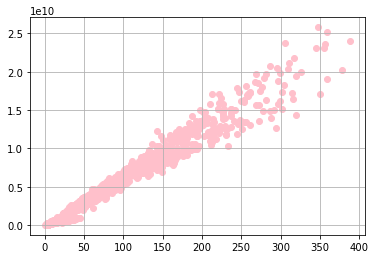

In [10]:
plt.scatter(df['Open'], df['Market Cap'], color='pink')
plt.grid(True)
plt.show()

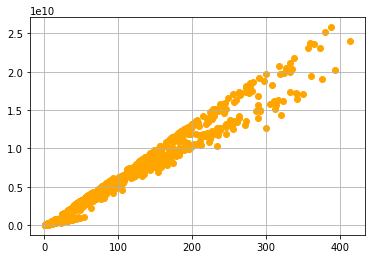

In [11]:
plt.scatter(df['High'], df['Market Cap'], color='orange')
plt.grid(True)
plt.show()

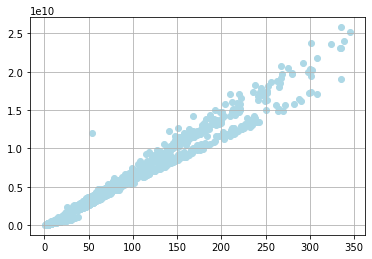

In [12]:
plt.scatter(df['Low'], df['Market Cap'], color='lightblue')
plt.grid(True)
plt.show()

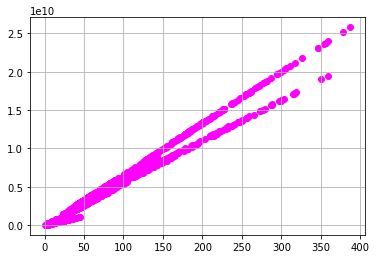

In [13]:
plt.scatter(df['Close'], df['Market Cap'], color='magenta')
plt.grid(True)
plt.show()

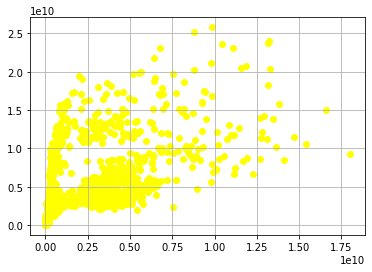

In [14]:
plt.scatter(df['Volume'], df['Market Cap'], color='yellow')
plt.grid(True)
plt.show()

In [15]:
X=df.drop(["Market Cap"], axis=1)

y=df["Market Cap"]

In [16]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)

In [17]:
print(utils.multiclass.type_of_target(y))

continuous


In [18]:
print(utils.multiclass.type_of_target(y.astype('int')))

multiclass


In [19]:
print(utils.multiclass.type_of_target(encoded))

multiclass


In [27]:
regr = linear_model.LinearRegression()
regr.fit(X, encoded)

LinearRegression()

In [28]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 897.4473320206065
Coefficients: 
 [ 1.49066030e+01 -3.25562898e+01  1.16329781e+01  1.80534347e+01
  7.55420686e-08]


In [29]:
X = sm.add_constant(X)

In [30]:
model = sm.OLS(encoded, X).fit()
predictions = model.predict(X) 

In [31]:
print_model = model.summary()
print(print_model) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     1540.
Date:                Wed, 23 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:54:44   Log-Likelihood:                -22372.
No. Observations:                2970   AIC:                         4.476e+04
Df Residuals:                    2964   BIC:                         4.479e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        897.4473     10.681     84.022      0.0

In [32]:
X_train, X_test, encoded_train, encoded_test = train_test_split(X, encoded, train_size=0.7)

In [33]:
y_pred = model.predict(X_test)

In [34]:
df1=pd.DataFrame({'Predicted values':y_pred,'Actual values':encoded_test})
df1

,Predicted values,Actual values
353,1511.094827,1793
2254,911.967205,79
2868,928.792905,139
2831,926.815348,177
2127,929.511881,608
...,...,...
1185,2530.328870,2687
1053,1877.564059,2427
513,1875.084552,2225
1433,1395.190833,1677


In [20]:
model1 =  LinearRegression()

In [21]:
scaler = StandardScaler()

X = scaler.fit_transform(X) 

In [23]:
X_train, X_test, encoded_train, encoded_test = train_test_split(X, encoded, train_size=0.7)

In [24]:
result = []
model1.fit(X_train, encoded_train)
result.append(model1.score(X_test, encoded_test))
result

[0.7213462895958467]

In [25]:
y_pred1 = model1.predict(X_test)

In [26]:
df2=pd.DataFrame({'Predicted values':y_pred1,'Actual values':encoded_test})
df2

,Predicted values,Actual values
0,919.642754,269
1,1462.701476,1729
2,1901.928782,2333
3,938.397263,619
4,1881.795293,2420
...,...,...
886,1657.543927,2171
887,932.158760,408
888,944.737347,872
889,1619.294710,2038


In [27]:
import pickle
pkl_file= open('litecoinf.pkl',"wb")
pickle.dump(model1,pkl_file)
pkl_file.close()